In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
housing = fetch_california_housing()

In [3]:
X, y = housing.data, housing.target
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, random_state=7)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_all, y_train_all, random_state=11)

In [4]:
stand_scale = StandardScaler()

x_train_scale = stand_scale.fit_transform(X_train)
x_valid_scale = stand_scale.transform(X_valid)
x_test_scale = stand_scale.transform(X_test)

In [5]:
print(x_train_scale.shape, y_train.shape)
print(x_valid_scale.shape, y_test.shape)
print(x_test_scale.shape, y_valid.shape)

(11610, 8) (11610,)
(3870, 8) (5160,)
(5160, 8) (3870,)


In [7]:
learning_rates = [1e-4, 3*1e-4, 1e-3, 3*1e-3, 1e-2, 3*1e-2]
callbacks = [keras.callbacks.EarlyStopping(min_delta=1e-2, patience=5)]
historys = []
for lr in learning_rates:
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation="relu", input_shape=x_train_scale.shape[1:]),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer= keras.optimizers.SGD(lr), loss="mse")
    history = model.fit(x_train_scale, y_train, 
                    validation_data=(x_valid_scale, y_valid), 
                    epochs=20, 
                    callbacks=callbacks)
    historys.append(history)

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 4.3807 - val_loss: 3.7753
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 3.0822 - val_loss: 2.7440
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 2.2944 - val_loss: 2.1235
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8073 - val_loss: 1.7396
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 1.5002 - val_loss: 1.4964
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3025 - val_loss: 1.3381
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 1.1730 - val_loss: 1.2319
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0852 - val_loss: 1.1573
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0236 - val_loss: 1.1029
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9789 - val_loss: 1.0614

363/363 [==============================] - 1s 2ms/step - loss: 0.7507 - val_loss: 0.5211
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4467 - val_loss: 0.4400
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4273 - val_loss: 0.4538
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4089 - val_loss: 0.4109
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3944 - val_loss: 0.4030
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3858 - val_loss: 0.3918
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3886 - val_loss: 0.3902
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3810 - val_loss: 0.3868
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3761 - val_loss: 0.3780
Epoch 11/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3763 - val_loss: 0.3788
Epoch 12/

D:\anaconda3\lib\site-packages\tensorflow\python\keras\callbacks.py:1664: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):


363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan


learning_rate: 0.0001


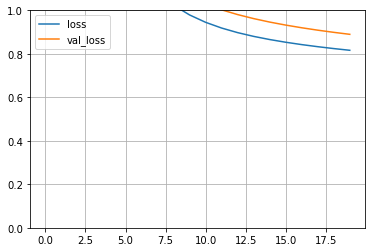

learning_rate: 0.00030000000000000003


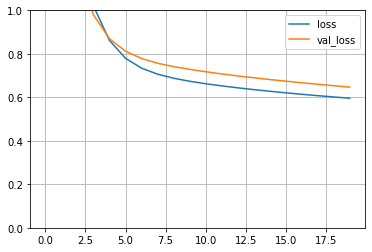

learning_rate: 0.001


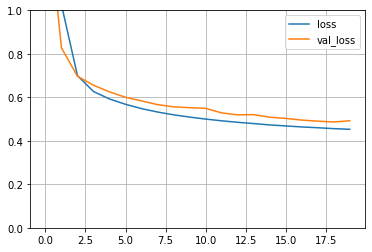

learning_rate: 0.003


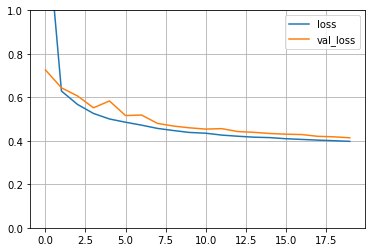

learning_rate: 0.01


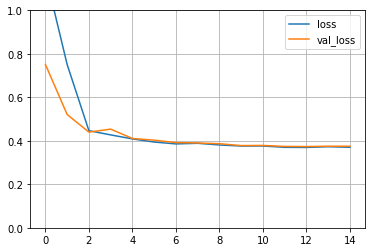

learning_rate: 0.03


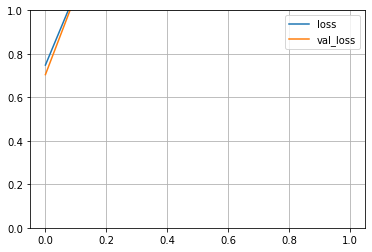

In [12]:
def plt_learning_curve(history):
    pd.DataFrame(history).plot(figsize=(6,4))
    plt.grid(True)
    plt.ylim(0, 1)
    plt.show()
    
for ln, history in zip(learning_rates, historys):
    print("learning_rate:",ln)
    plt_learning_curve(history.history)